 
 # Diabetes (NB, KNN)
 `Diabetes (NB, KNN)`
 
 
 **Diabetes (NB, KNN)**
 * Diabetes (NB, KNN)
 Diabetes (NB, KNN)
>Diabetes (NB, KNN)
 

In [33]:
import pandas as pd

data = pd.read_csv("E:/Data Science/CSV dataset/New Datasets/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
data.columns.values       # Displays column names as array

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [35]:
data.columns              # displays column names as index

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

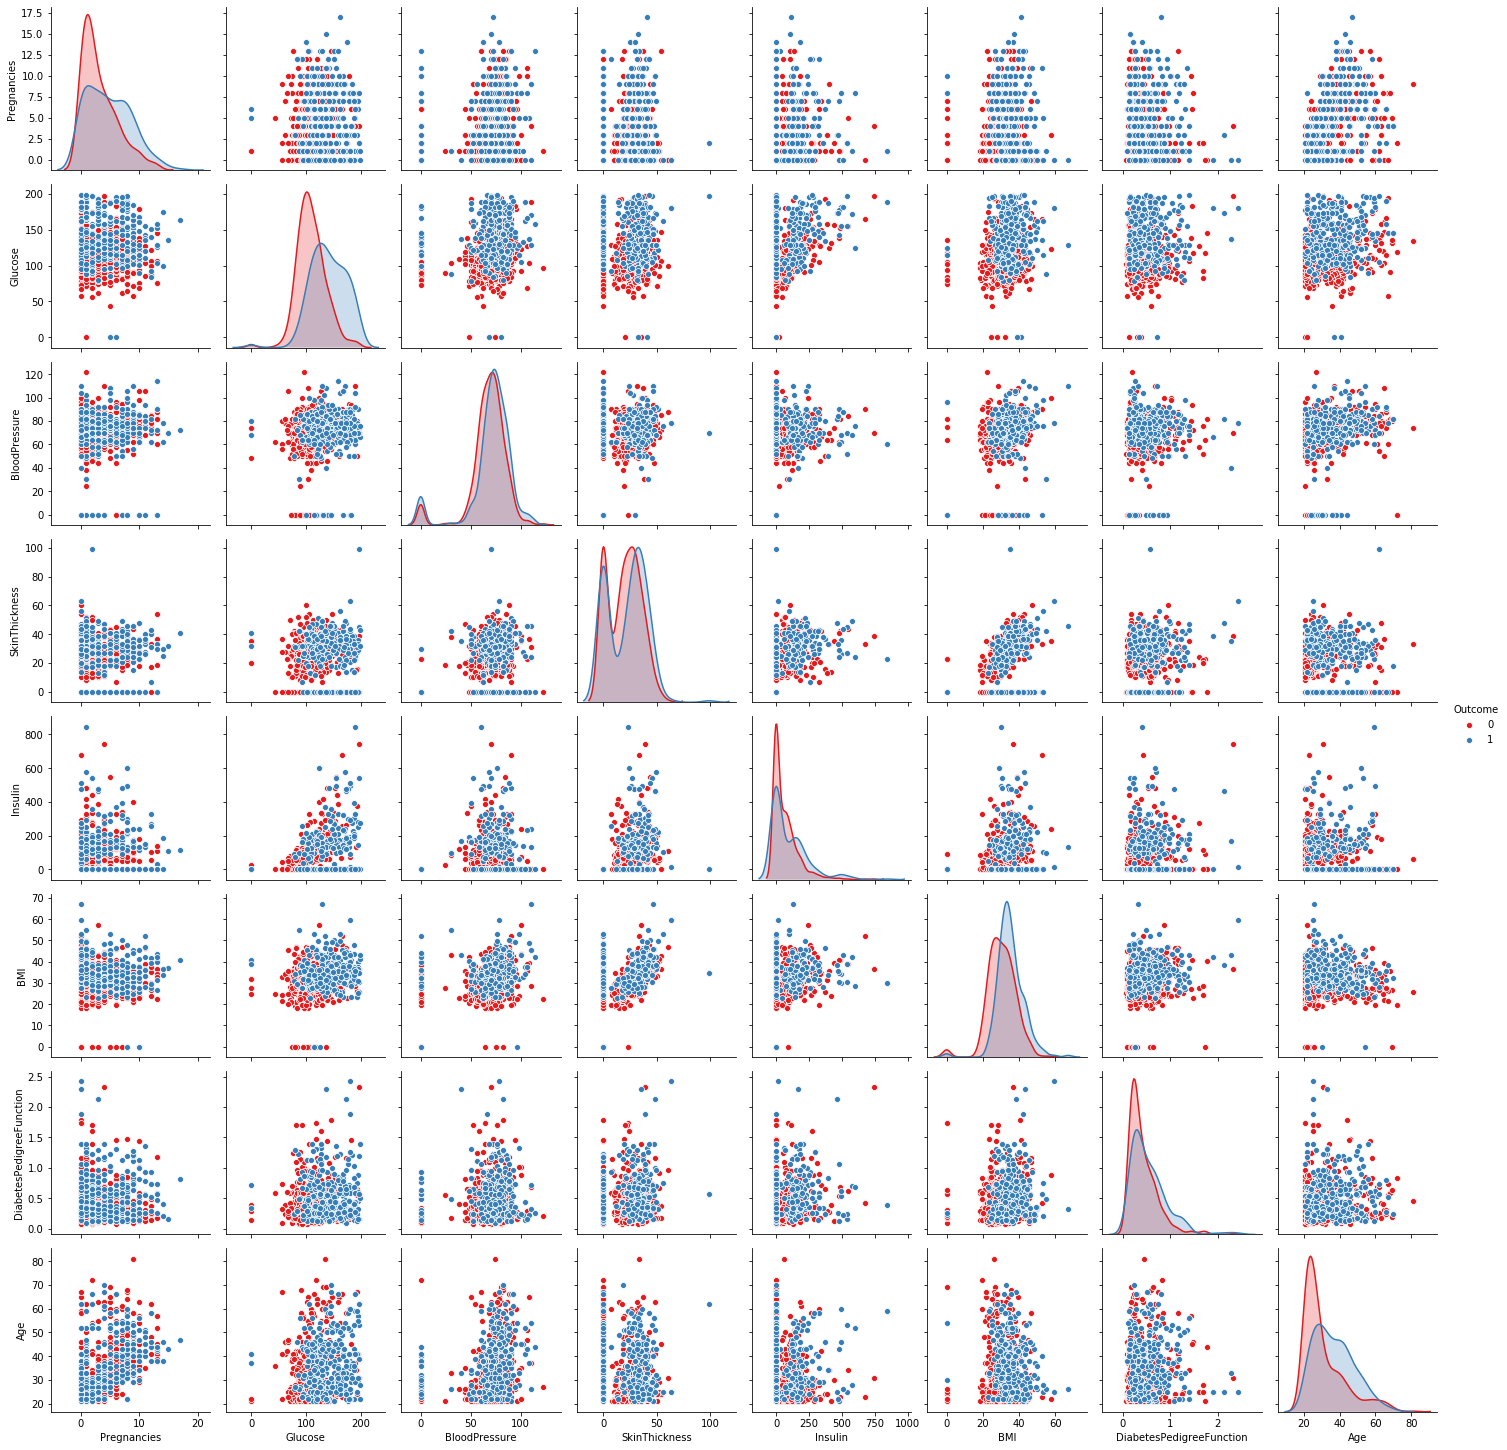

In [36]:
# drawing the pair plot

import seaborn as sns

sns.pairplot(data, hue = 'Outcome', palette= 'Set1')

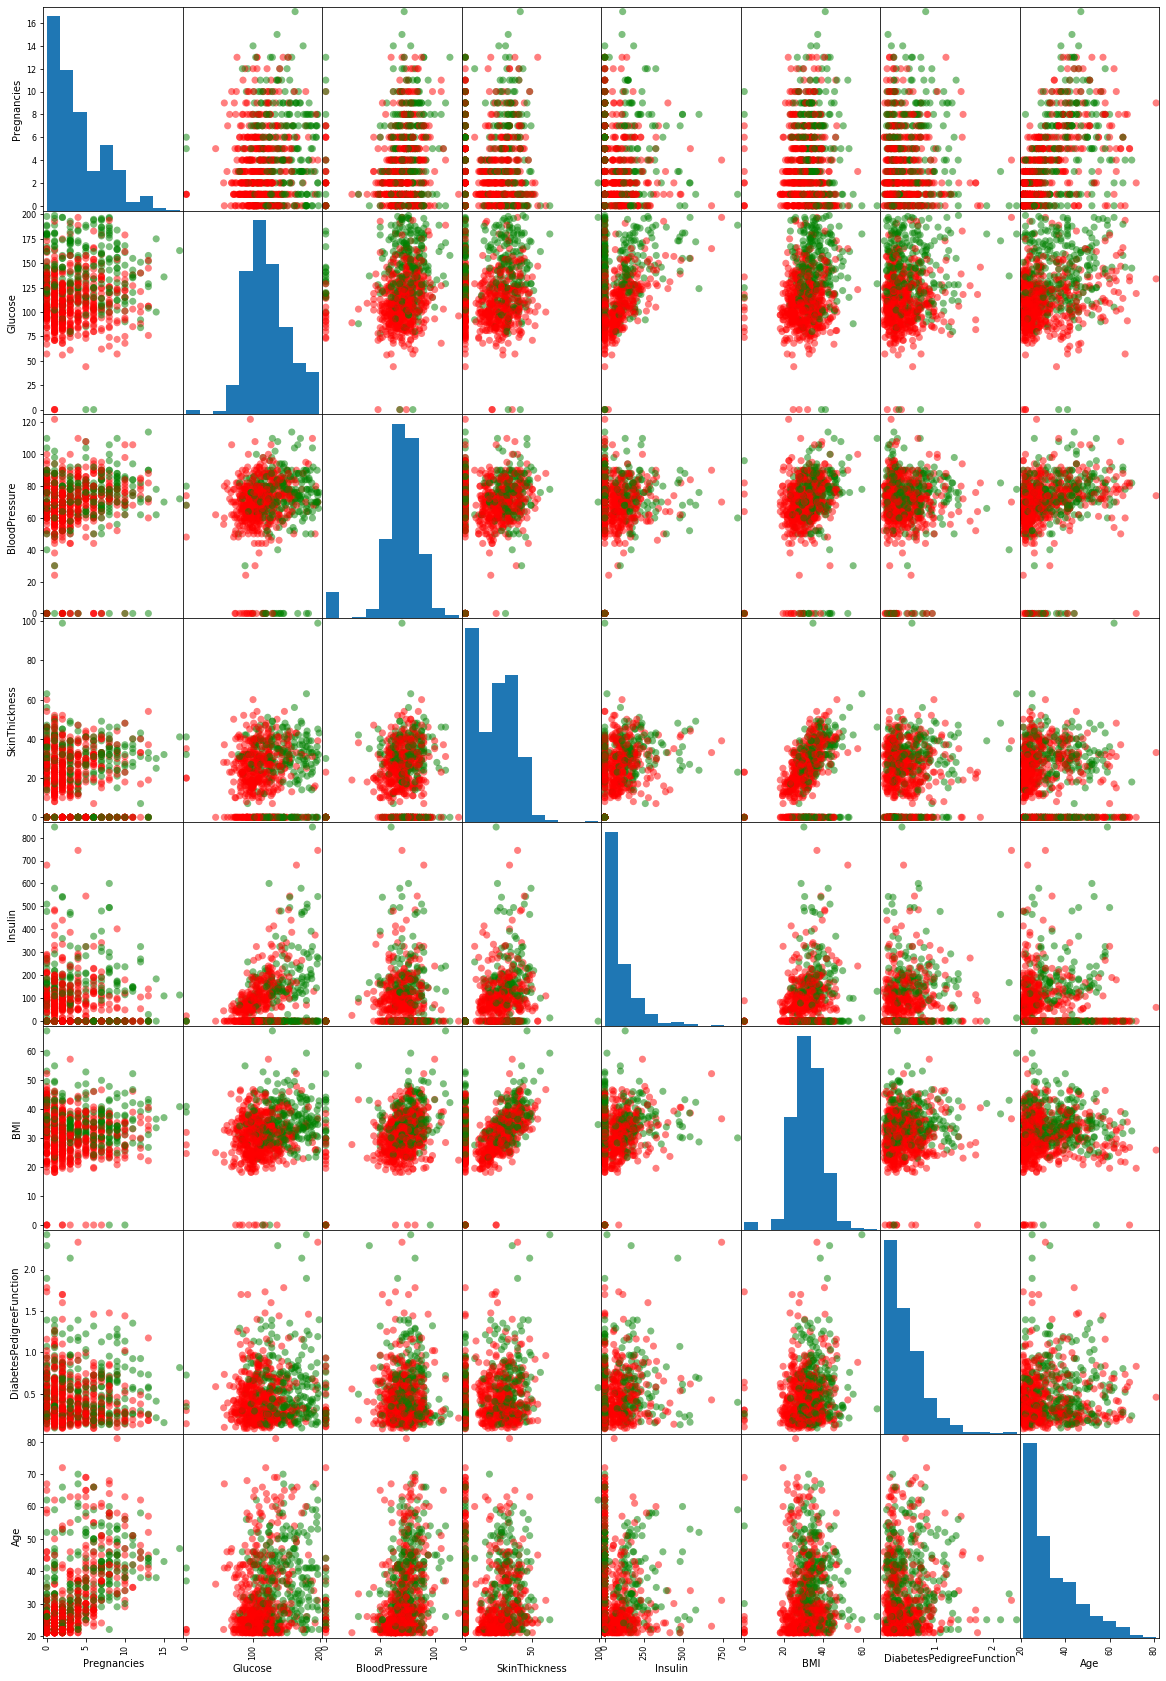

In [37]:
# Plotting the scatter plot to find the relation between the features

import matplotlib.pyplot as plt

color = ['red' if i == 0 else 'green' for i in data.loc[:, 'Outcome']]

pd.plotting.scatter_matrix(data.loc[:, data.columns != 'Outcome'],
           c = color,
           diagonal = 'hist',
           figsize = (20,30),
           alpha = 0.5,
           marker = 'o',
            s = 50)
plt.show()

# Using KNeighboursClassifier to predict the Outcomes

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# target variable

Y = data.loc[:, 'Outcome']

# Predictor variable
X = data.loc[:, data.columns != 'Outcome']

knn.fit(X, Y)

prediction = knn.predict(X)


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [40]:
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(x_train,y_train)
prediction = knn2.predict(x_test)

print('With KNN (K=5) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=5) accuracy is:  0.8311688311688312


In [41]:
# Testing Model complexity

import numpy as np
from sklearn.metrics import accuracy_score

neigh = np.arange(1,25)
accuracy = []
def model_com(x_train, x_test, y_train, y_test):
    
    # defining the model and iterating over the range for diff hyperparameters
    for i in neigh:
        KNN = KNeighborsClassifier(n_neighbors = i)
        KNN.fit(x_train, y_train)

        pred = KNN.predict(x_test)
        score = accuracy_score(y_test, pred)
        accuracy.append(score)
        print(f"Model accuracy for (n_estimators = {i}) is :: %3.4f"%score)
        
    
model_com(x_train, x_test, y_train, y_test)
print("\n\nAccuracy scores in an array :", accuracy)

Model accuracy for (n_estimators = 1) is :: 0.7576
Model accuracy for (n_estimators = 2) is :: 0.7229
Model accuracy for (n_estimators = 3) is :: 0.7359
Model accuracy for (n_estimators = 4) is :: 0.7229
Model accuracy for (n_estimators = 5) is :: 0.7706
Model accuracy for (n_estimators = 6) is :: 0.7576
Model accuracy for (n_estimators = 7) is :: 0.7619
Model accuracy for (n_estimators = 8) is :: 0.7489
Model accuracy for (n_estimators = 9) is :: 0.7489
Model accuracy for (n_estimators = 10) is :: 0.7532
Model accuracy for (n_estimators = 11) is :: 0.7662
Model accuracy for (n_estimators = 12) is :: 0.7706
Model accuracy for (n_estimators = 13) is :: 0.7749
Model accuracy for (n_estimators = 14) is :: 0.7662
Model accuracy for (n_estimators = 15) is :: 0.7879
Model accuracy for (n_estimators = 16) is :: 0.7922
Model accuracy for (n_estimators = 17) is :: 0.7879
Model accuracy for (n_estimators = 18) is :: 0.7706
Model accuracy for (n_estimators = 19) is :: 0.7706
Model accuracy for (n

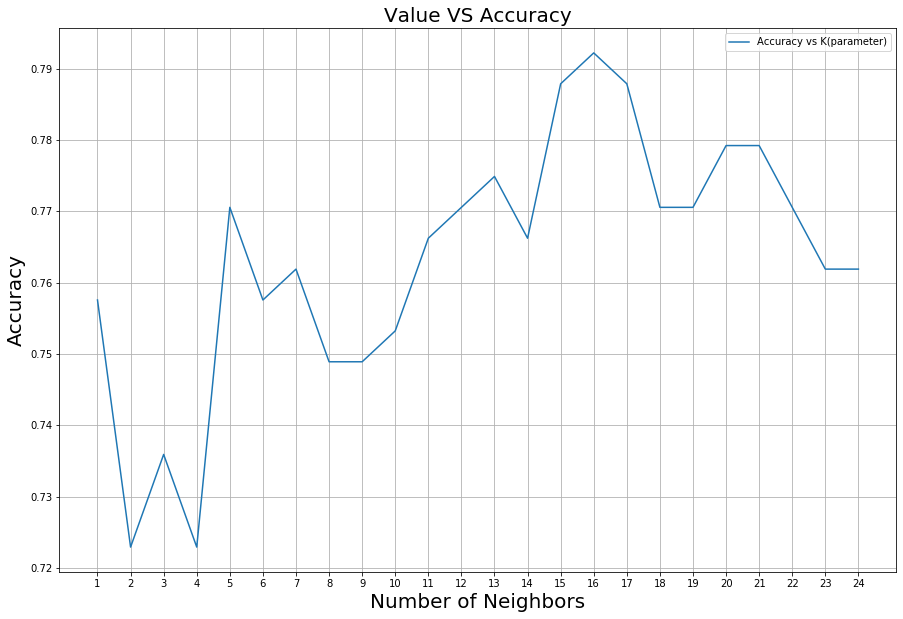

Best accuracy is given at K = 16 and its values if 0.792


In [42]:
# Plotting the data

plt.figure(figsize = (15,10))
plt.plot(neigh, accuracy, label = 'Accuracy vs K(parameter)')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neigh)
plt.grid()
plt.show()
print("Best accuracy is given at K = {} and its values if {}".format(np.argmax(accuracy) + 1, \
                                                                     round(np.max(accuracy),3)))


# + 1 because the index will be 15 starting from 0

Observation:
    
   * It shows that at n_estimators = 16, model gives the highest accuracy score

# Plotting Confusion matrix to visualize the correct and wrong predictions

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

matrix = confusion_matrix(y_test, prediction)
matrix                                        # Creates an array of values not a df

array([[128,  18],
       [ 35,  50]], dtype=int64)

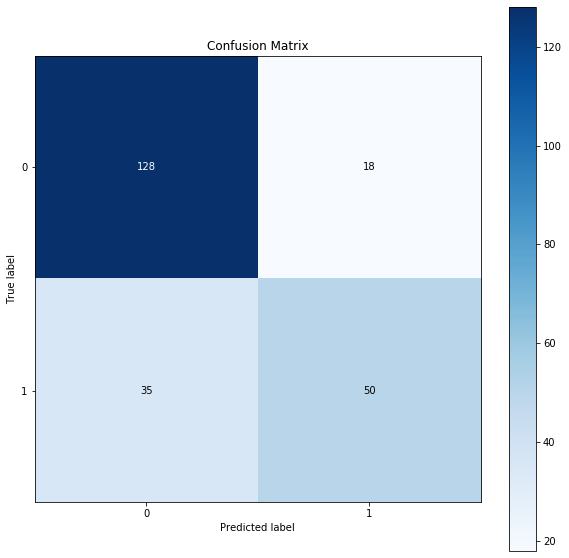

In [44]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, prediction, figsize= (10,10))

In [45]:
# Another way using crosstab

actual = pd.Series(y_test)
predicted = pd.Series(prediction)
table = pd.crosstab(actual, predicted, rownames = ['Actual'], colnames = ['Predicted'], margins = True)
table

Predicted,0,1,All
Actual,,,
0,28,15,43
1,23,6,29
All,51,21,72


In [46]:
# Another method by creating a df and then plotting with heatmap

values = confusion_matrix(y_test, prediction)
df_cf = pd.DataFrame(values, columns = np.unique(y_test), index = np.unique(prediction))
df_cf.columns.name = 'Actual'
df_cf.index.name = 'Predicted'
df_cf

Actual,0,1
Predicted,,
0,128,18
1,35,50


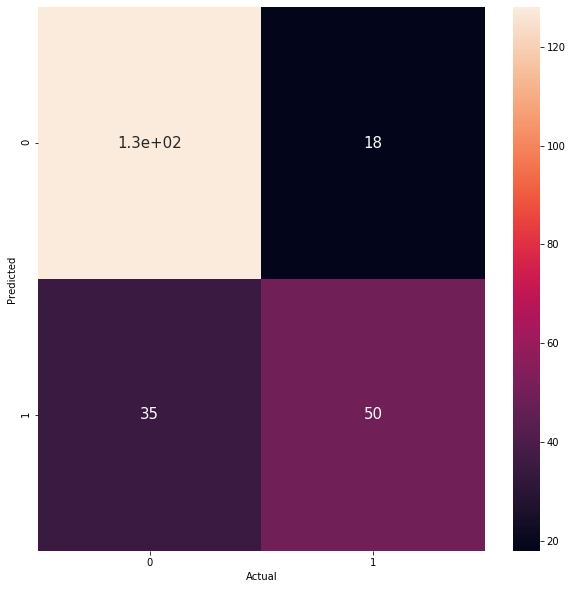

In [47]:
# Plotting a heat map of Confusion Matrix

plt.figure(figsize = (10,10))
sns.heatmap(df_cf, annot = True, annot_kws = {'size': 15})  ## annot_kws for font size

# Class Distributuon ::

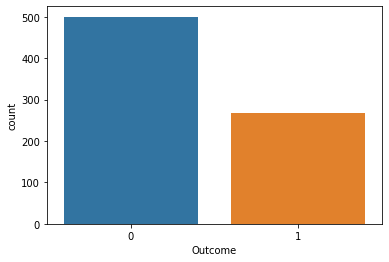

In [48]:
sns.countplot(data['Outcome'])

# TUNING AND HYPERPARAMETERS ::

In [49]:
# Performing Grid Search cross validation with 1 Hyperparameter

from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors': np.arange(1,25)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV

knn_cv.fit(X,Y)# Fit

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
print("The Best tuned hyperparameter for current grid is : ", knn_cv.best_params_)
print("\nBest Score is : %.4f"%knn_cv.best_score_)
print("\nBest Estimator is : ", knn_cv.best_estimator_)

The Best tuned hyperparameter for current grid is :  {'n_neighbors': 8}

Best Score is : 0.7552

Best Estimator is :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


In [51]:
# Changing the parameters

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid = {'n_neighbors': np.arange(1,25)}
knn3 = KNeighborsClassifier(n_neighbors = 5, p =2, metric= 'minkowski')

knn_cv2 = GridSearchCV(knn3, grid, cv = 3)

knn_cv2.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
print("The Best tuned hyperparameter for current grid is : ", knn_cv2.best_params_)
print("\nBest Score is : %.4f"%knn_cv2.best_score_)
print("\nBest Estimator is : ", knn_cv2.best_estimator_)

The Best tuned hyperparameter for current grid is :  {'n_neighbors': 12}

Best Score is : 0.7225

Best Estimator is :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')


In [53]:
from sklearn.neighbors import KNeighborsClassifier
train_score_knn=[]
test_score_knn=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=12, p=i, metric='minkowski')
    knn.fit(x_train, y_train)
    train_score_knn.append(knn.score(x_train, y_train))
    test_score_knn.append(knn.score(x_test, y_test))
    print('For p value=',i)
    print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(x_train, y_train)))
    print('The accuracy of the knn classifier is {:.2f} out of 1 on test data\n'.format(knn.score(x_test, y_test)))



For p value= 1
The accuracy of the knn classifier is 0.77 out of 1 on training data
The accuracy of the knn classifier is 0.81 out of 1 on test data

For p value= 2
The accuracy of the knn classifier is 0.78 out of 1 on training data
The accuracy of the knn classifier is 0.77 out of 1 on test data

For p value= 3
The accuracy of the knn classifier is 0.80 out of 1 on training data
The accuracy of the knn classifier is 0.77 out of 1 on test data

For p value= 4
The accuracy of the knn classifier is 0.79 out of 1 on training data
The accuracy of the knn classifier is 0.77 out of 1 on test data

For p value= 5
The accuracy of the knn classifier is 0.79 out of 1 on training data
The accuracy of the knn classifier is 0.76 out of 1 on test data

For p value= 6
The accuracy of the knn classifier is 0.78 out of 1 on training data
The accuracy of the knn classifier is 0.76 out of 1 on test data

For p value= 7
The accuracy of the knn classifier is 0.77 out of 1 on training data
The accuracy of 

In [54]:
# creating a dataset for the practicing

# Creating values using randint so that only integer values are obtained
values = np.random.randint(10, 50, 60).reshape(20,3)

#creating df
data1 = pd.DataFrame(values, columns = ['Temp1', 'Temp2', 'Temp3'])

# Adding new column : Rain Prob where 0: no rain & 1 : rain

outcome = np.random.randint(0,2,20).reshape(20,1)
data1['Rain Prob.'] = outcome

# Final Dataset

data1

,Temp1,Temp2,Temp3,Rain Prob.
0,46,44,10,1
1,40,35,12,1
2,48,13,23,0
3,43,28,41,1
4,31,33,25,0
5,38,21,11,1
6,29,20,28,1
7,31,28,21,0
8,40,32,27,1
9,30,20,33,1


# NAIVE BAYES THEOREM :

In [55]:
# importing libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [56]:
# Using same dataset

df = pd.read_csv("E:/Data Science/CSV dataset/New Datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Additional details about the attributes:-

>Pregnancies: Number of times pregnant

>Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

>BloodPressure: Diastolic blood pressure (mm Hg)

>SkinThickness: Triceps skin fold thickness (mm)

>Insulin: 2-Hour serum insulin (mu U/ml)

>BMI: Body mass index (weight in kg/(height in m)^2)

>DiabetesPedigreeFunction: Diabetes pedigree function

>Age: Age (years)

>Outcome: Class variable (0 or 1)

In [57]:
# Info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Grouping Based On Outcome

In [58]:
df.groupby(['Outcome']).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


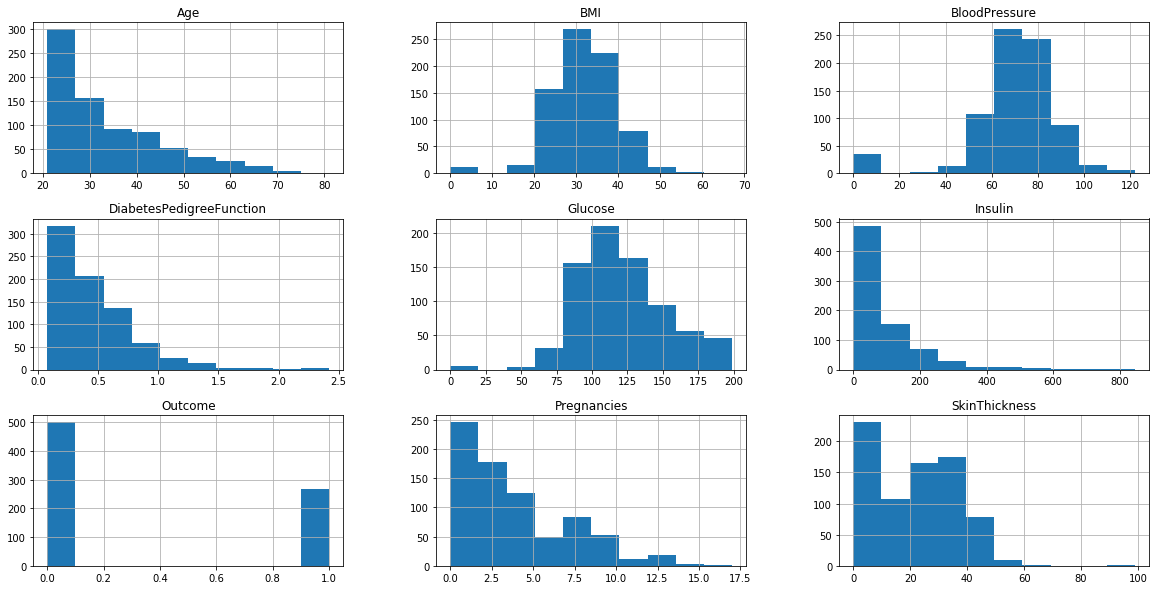

In [59]:
# Making Histogram of the dataset

df.hist(figsize= (20,10))
plt.show()

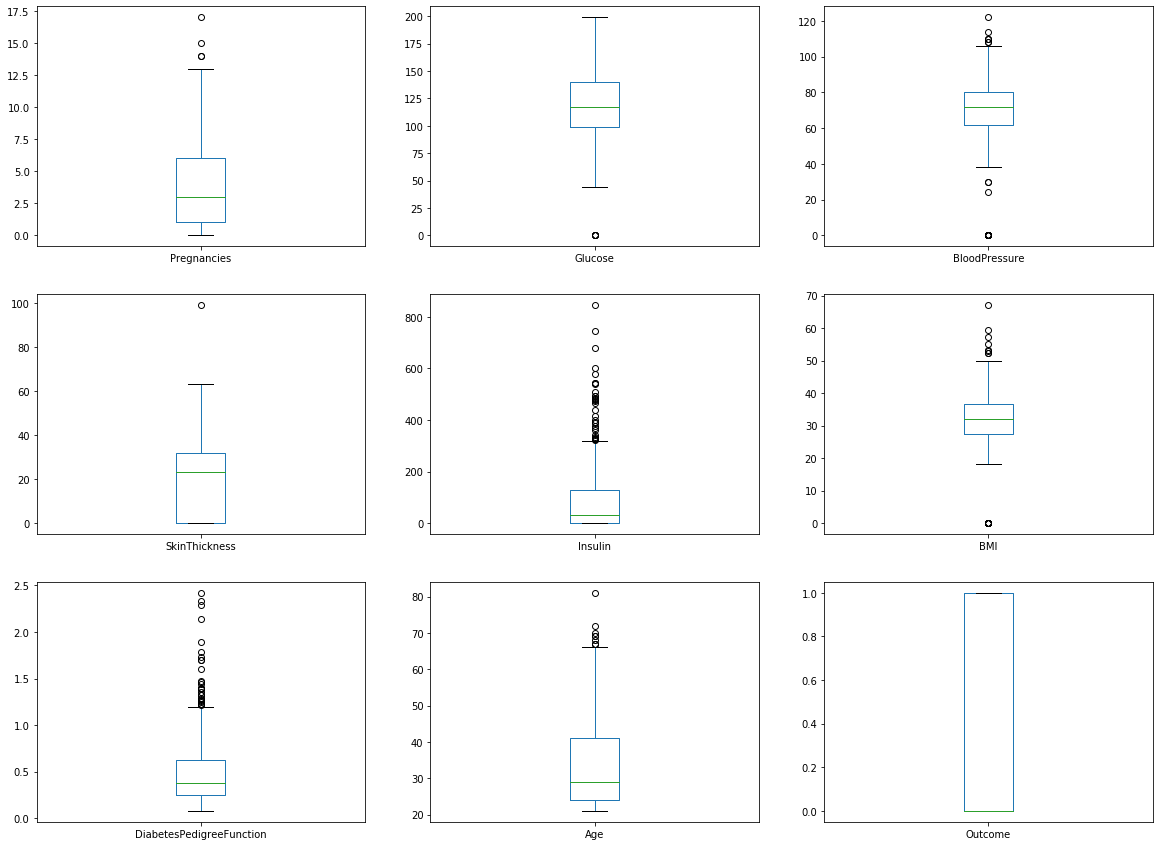

In [60]:
# Making boxplots combined


df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (20,15))

# Sharex & sharey keeps the all correspinding values of the columns when plotting
# Else all the plots will be of same units/margins/points on axis

plt.show()

# Defining features :

In [61]:
P = df.loc[:, data.columns != 'Outcome']
T = df.loc[:, data.columns == 'Outcome']


In [62]:
# splitting the data

x_train, x_test, y_train, y_test = train_test_split(P, T, random_state = 19, )

In [63]:
# Defining the classifier

classifier = GaussianNB()
classifier.fit(x_train, y_train)

predict = classifier.predict(x_test)
predict

C:\Users\pushp\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [64]:
# making confusion matrix

matrix = confusion_matrix(predict, y_test)
matrix

array([[111,  29],
       [ 18,  34]], dtype=int64)

In [65]:
# Printing the scores

print("f1 Score of the prediction  :: %.4f"%f1_score(y_test, predict))
print("\nAccuracy Score of the prediction  :: %.4f"%accuracy_score(y_test, predict))

f1 Score of the prediction  :: 0.5913

Accuracy Score of the prediction  :: 0.7552


# Plotting :

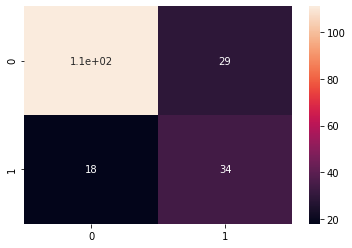

In [66]:
sns.heatmap(matrix, annot = True)

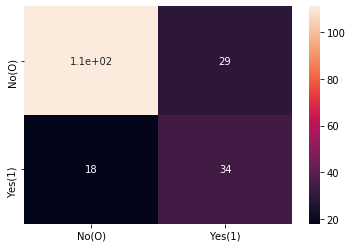

In [67]:
# With labels

label = ['No(O)', 'Yes(1)']
sns.heatmap(matrix, annot= True, xticklabels= label, yticklabels= label)

In [68]:
# printing classification report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       129
           1       0.65      0.54      0.59        63

    accuracy                           0.76       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192

